In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [2]:
plt.style.use("ggplot")
df = pd.read_csv("weight_horsepower_mpg.csv")
df

,weight,horsepower,mpg
0,3504.0,130.0,18.0
1,3693.0,165.0,15.0
2,3436.0,150.0,18.0
3,3433.0,150.0,16.0
4,3449.0,140.0,17.0
...,...,...,...
387,2790.0,86.0,27.0
388,2130.0,52.0,44.0
389,2295.0,84.0,32.0
390,2625.0,79.0,28.0


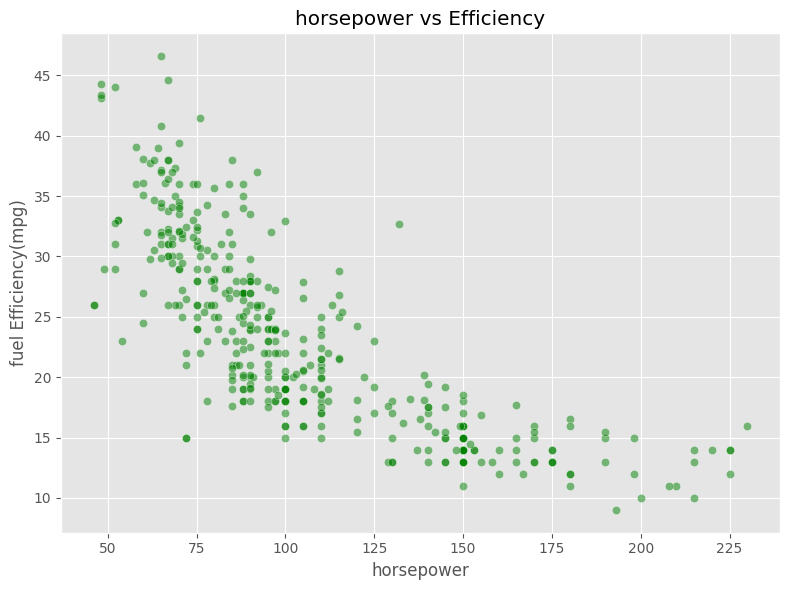

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="horsepower",
    y="mpg",
    data=df,
    alpha=0.5,
    color="green")
plt.xlabel("horsepower")
plt.ylabel("fuel Efficiency(mpg)")

plt.title("horsepower vs Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
weight=df["weight"]
horsepower=df["horsepower"]
mpg=df["mpg"]
weight_mean=weight.mean()
weight_std=weight.std()
weight_norm=(weight-weight_mean)/weight_std
horsepower_mean=horsepower.mean()
horsepower_std=horsepower.std()
horsepower_norm=(horsepower-horsepower_mean)/horsepower_std
x2=horsepower_norm
x1=weight_norm
y=df["mpg"]

In [14]:
x1=torch.tensor(x1,dtype=torch.float32)
x2=torch.tensor(x2,dtype=torch.float32)
y =torch.tensor(y, dtype=torch.float32)

C:\Users\User\AppData\Local\Temp\ipykernel_17712\4074370975.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1=torch.tensor(x1,dtype=torch.float32)
C:\Users\User\AppData\Local\Temp\ipykernel_17712\4074370975.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2=torch.tensor(x2,dtype=torch.float32)


In [16]:
a1=0.0
a2=0.0
b =0.0
a1=torch.tensor(a1,requires_grad=True)
a2=torch.tensor(a2,requires_grad=True)
b =torch.tensor(b, requires_grad=True)
m=len(x1)
epochs=1000
learning_rate=0.01

In [29]:
for epoch in range(epochs):
    h=a1*x1+a2*x2+b
    error=h-y
    cost=(1/m)*torch.sum(error**2)
   
    print(f"Epoch: {epoch:.4f}, cost:{cost:.4f},a1:{a1:.4f},a2:{a2:.4f},b:{b:.4f}")
    cost.backward()
    with torch.no_grad():
        a1-=learning_rate*a1.grad
        a2-=learning_rate*a2.grad
        b -=learning_rate* b.grad
        a1.grad.zero_()
        a2.grad.zero_()
        b.grad.zero_()
print(f"\n 최적화된 선형회귀식: mpg={a1:.4f} *weight+{a2:.4f} * horsepower+{b:.4f}")   

Epoch: 0.0000, cost:610.4738,a1:0.0000,a2:0.0000,b:0.0000
Epoch: 1.0000, cost:585.6155,a1:-0.1296,a2:-0.1212,b:0.4689
Epoch: 2.0000, cost:561.8447,a1:-0.2545,a2:-0.2378,b:0.9285
Epoch: 3.0000, cost:539.1107,a1:-0.3749,a2:-0.3498,b:1.3788
Epoch: 4.0000, cost:517.3653,a1:-0.4910,a2:-0.4576,b:1.8201
Epoch: 5.0000, cost:496.5631,a1:-0.6029,a2:-0.5612,b:2.2527
Epoch: 6.0000, cost:476.6607,a1:-0.7107,a2:-0.6608,b:2.6765
Epoch: 7.0000, cost:457.6169,a1:-0.8147,a2:-0.7566,b:3.0919
Epoch: 8.0000, cost:439.3925,a1:-0.9150,a2:-0.8486,b:3.4990
Epoch: 9.0000, cost:421.9503,a1:-1.0117,a2:-0.9371,b:3.8979
Epoch: 10.0000, cost:405.2549,a1:-1.1050,a2:-1.0222,b:4.2889
Epoch: 11.0000, cost:389.2727,a1:-1.1949,a2:-1.1039,b:4.6720
Epoch: 12.0000, cost:373.9716,a1:-1.2816,a2:-1.1825,b:5.0475
Epoch: 13.0000, cost:359.3211,a1:-1.3652,a2:-1.2580,b:5.4155
Epoch: 14.0000, cost:345.2921,a1:-1.4458,a2:-1.3306,b:5.7761
Epoch: 15.0000, cost:331.8570,a1:-1.5236,a2:-1.4003,b:6.1295
Epoch: 16.0000, cost:318.9896,a1:-1.

In [32]:
weight_input=100
horsepower_input=120
weight_input_norm = (weight_input-weight_mean)/weight_std
horsepower_input_norm=(horsepower_input-horsepower_mean)/horsepower_std


In [33]:
predicted_mpg=a1*weight_input_norm+a2*horsepower_input_norm+b
print(f"\n w=100 , horsepower=120 일때 연비:{predicted_mpg:.4f}")


 w=100 , horsepower=120 일때 연비:38.9917
